In [1]:
%matplotlib inline
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import SimpleITK as sitk

from azure.ai.ml import MLClient
from azure.identity import DefaultAzureCredential

# DDR Dataset

In [4]:
# !umount /tmp/new_dicom

In [2]:
# Copy data from data asset to local folder 
ml_client = MLClient.from_config(credential=DefaultAzureCredential())
ml_client.data.mount("{your Datastore URI}", "/tmp/ddr_dataset")

Found the config file in: /config.json
Method mount: This is an experimental method, and may change at any time. Please see https://aka.ms/azuremlexperimental for more information.


Resolving credential...
trying to get token from DefaultAzureCredential
resolved DefaultAzureCredential to ManagedIdentityCredential
resolved ManagedIdentityCredential to AzureMLCredential
trying to get token from AzureMLCredential
Resolved credential.
Mount starting...
Subprocess PID: 4878
Mount started successfully.
To unmount, run `$ umount /tmp/ddr_dataset`.
Logs can be found at /tmp/azureml-logs/dataprep/rslex-fuse-cli


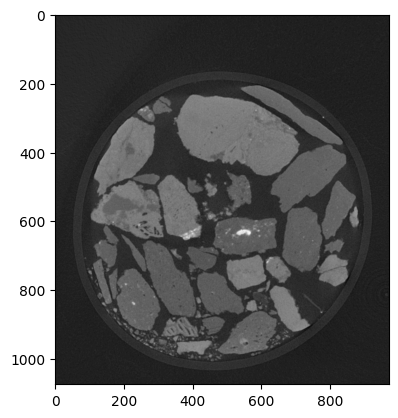

In [3]:
# Read DICOM files and visualize
foldername = "/tmp/ddr_dataset"
image_reader = sitk.ImageFileReader()
image_reader.SetFileName(f'{foldername}/DDR_001_1498_1500_#3_0512.dcm')
image = image_reader.Execute()

image_array = sitk.GetArrayFromImage(image)
plt.imshow(image_array[0], cmap='gray')
plt.show()

In [4]:
# Show image resolution (by array)
image_array[0].shape

(1074, 970)

In [5]:
# Read the DICOM series
series_reader = sitk.ImageSeriesReader()
dicom_names = series_reader.GetGDCMSeriesFileNames(foldername)
series_reader.SetFileNames(dicom_names)

# Load the series and convert to array
series = series_reader.Execute()
series_array = sitk.GetArrayFromImage(series)

ImageSeriesReader (0x5574f5db77a0): Non uniform sampling or missing slices detected,  maximum nonuniformity:7.47273e-07



In [6]:
# For performance reasons, you might want to downsample your volume
# if the full resolution is not required for the visualization
factor = 10 # downsampling factor
series_downsampled = series_array[::factor, ::factor, ::factor]
print("Before downsampling : ", series_array.shape)
print("After downsampling : ", series_downsampled.shape)

Before downsampling :  (551, 1074, 970)
After downsampling :  (56, 108, 97)


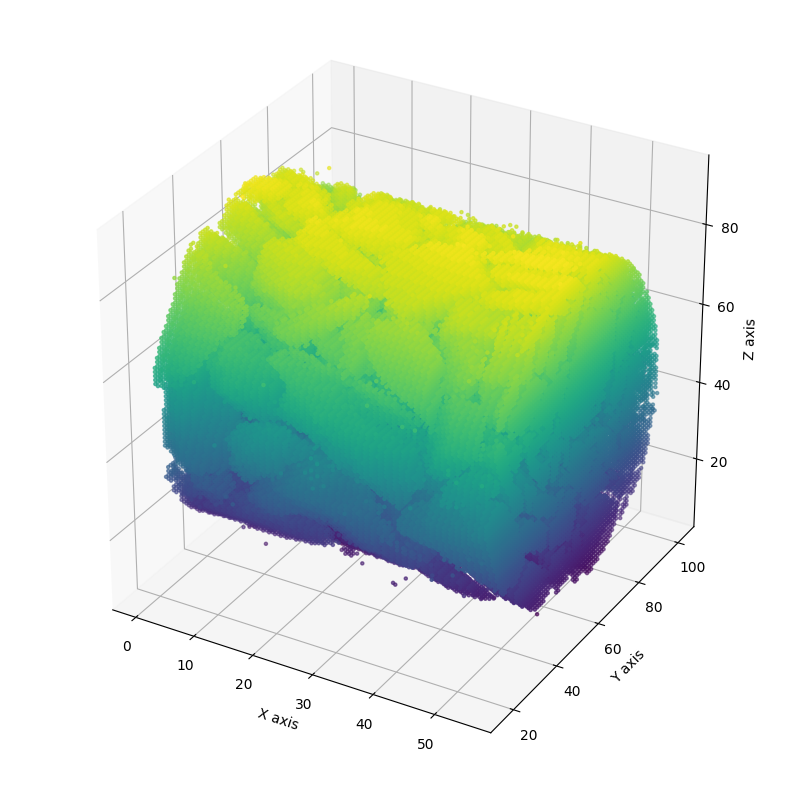

In [7]:
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Threshold the volume to find the voxels to plot
# Adjust the threshold value as needed for your data
threshold = series_downsampled.mean()
# threshold = 7000
x, y, z = np.where(series_downsampled > threshold)

# Plot the points
ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')

# Set labels and show the plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# Lung Dataset

In [8]:
# !umount /tmp/lung_dataset

In [9]:
ml_client = MLClient.from_config(credential=DefaultAzureCredential())
ml_client.data.mount("{your Datastore URI}", "/tmp/lung_dataset")

Found the config file in: /config.json


Resolving credential...
trying to get token from DefaultAzureCredential
resolved DefaultAzureCredential to ManagedIdentityCredential
resolved ManagedIdentityCredential to AzureMLCredential
trying to get token from AzureMLCredential
Resolved credential.
Mount starting...
Subprocess PID: 5076
Mount started successfully.
To unmount, run `$ umount /tmp/lung_dataset`.
Logs can be found at /tmp/azureml-logs/dataprep/rslex-fuse-cli


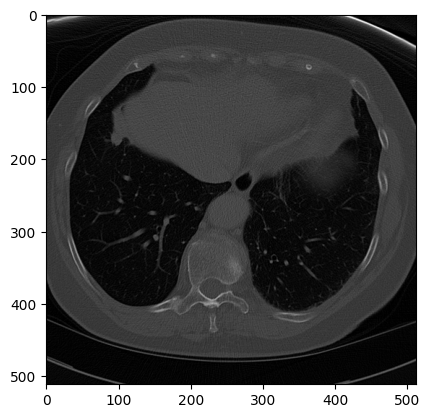

In [31]:
# Read DICOM files and visualize
foldername = "/tmp/lung_dataset"
image_reader = sitk.ImageFileReader()
image_reader.SetFileName(f'{foldername}/000007.dcm')
image = image_reader.Execute()

image_array = sitk.GetArrayFromImage(image)
plt.imshow(image_array[0], cmap='gray')
plt.show()

In [32]:
# Show image resolution (by array)
image_array[0].shape

(512, 512)

In [33]:
# Read the DICOM series
series_reader = sitk.ImageSeriesReader()
dicom_names = series_reader.GetGDCMSeriesFileNames(foldername)
series_reader.SetFileNames(dicom_names)

# Load the series and convert to array
series = series_reader.Execute()
series_array = sitk.GetArrayFromImage(series)

In [37]:
# For performance reasons, you might want to downsample your volume
# if the full resolution is not required for the visualization
factor = 1 # downsampling factor
series_downsampled = series_array[::factor, ::factor, ::factor]
print("Before downsampling : ", series_array.shape)
print("After downsampling : ", series_downsampled.shape)

Before downsampling :  (99, 512, 512)
After downsampling :  (99, 512, 512)


In [38]:
# To change angle of image
series_downsampled = np.transpose(series_downsampled, (2,1,0))
series_downsampled.shape

(512, 512, 99)

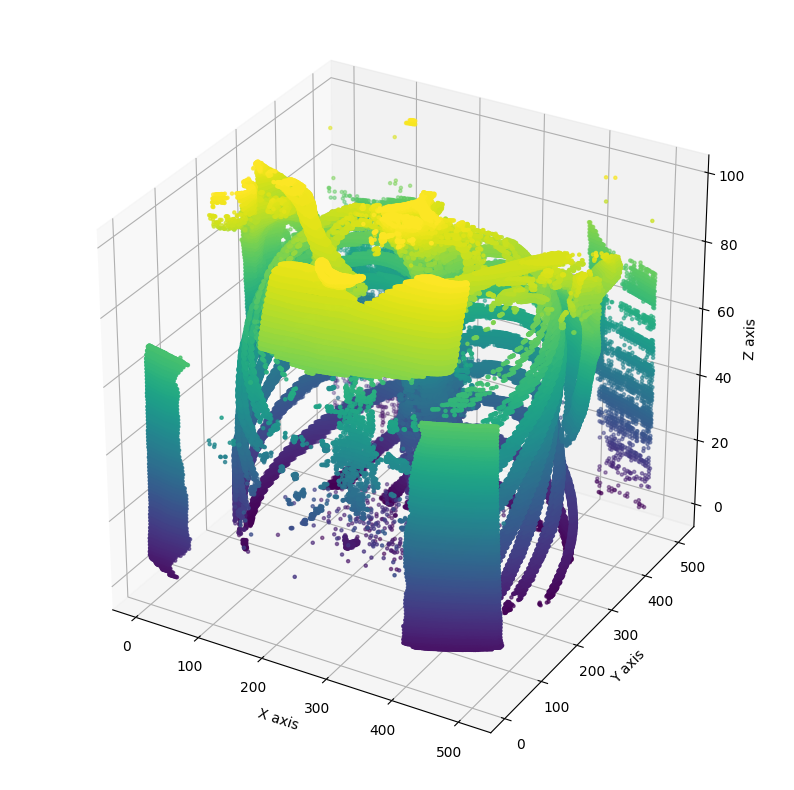

In [42]:
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Threshold the volume to find the voxels to plot
# Adjust the threshold value as needed for your data
# threshold = series_downsampled.mean()
threshold = 500
x, y, z = np.where(series_downsampled > threshold)

# Plot the points
ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')

# Set labels and show the plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()

# MRI Dataset

In [ ]:
# !umount /tmp/mri_dataset

In [20]:
ml_client = MLClient.from_config(credential=DefaultAzureCredential())
ml_client.data.mount("{your Datastore URI}", "/tmp/mri_dataset")

Found the config file in: /config.json


Resolving credential...
trying to get token from DefaultAzureCredential
resolved DefaultAzureCredential to ManagedIdentityCredential
resolved ManagedIdentityCredential to AzureMLCredential
trying to get token from AzureMLCredential
Resolved credential.
Mount starting...
Subprocess PID: 6142
Mount started successfully.
To unmount, run `$ umount /tmp/mri_dataset`.
Logs can be found at /tmp/azureml-logs/dataprep/rslex-fuse-cli


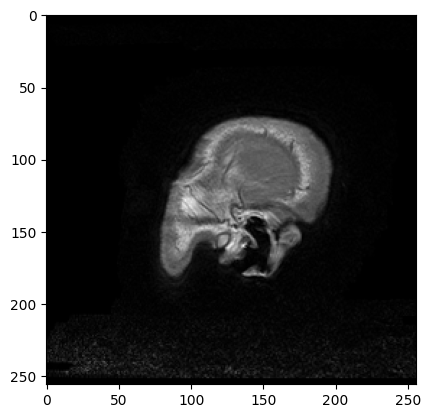

In [43]:
# Read DICOM files and visualize
foldername = "/tmp/mri_dataset"
image_reader = sitk.ImageFileReader()
image_reader.SetFileName(f'{foldername}/IM-0004-0021.dcm')
image = image_reader.Execute()

image_array = sitk.GetArrayFromImage(image)
plt.imshow(image_array[0], cmap='gray')
plt.show()

In [44]:
# Show image resolution (by array)
image_array[0].shape

(256, 256)

In [45]:
# Read the DICOM series
series_reader = sitk.ImageSeriesReader()
dicom_names = series_reader.GetGDCMSeriesFileNames(foldername)
series_reader.SetFileNames(dicom_names)

# Load the series and convert to array
series = series_reader.Execute()
series_array = sitk.GetArrayFromImage(series)

In [62]:
# For performance reasons, you might want to downsample your volume
# if the full resolution is not required for the visualization
factor = 1 # downsampling factor
series_downsampled = series_array[::factor, ::factor, ::factor]
print("Before downsampling : ", series_array.shape)
print("After downsampling : ", series_downsampled.shape)

Before downsampling :  (184, 256, 256)
After downsampling :  (184, 256, 256)


In [63]:
# To change angle of image
series_downsampled = np.transpose(series_downsampled, (0,2,1))
series_downsampled.shape

(184, 256, 256)

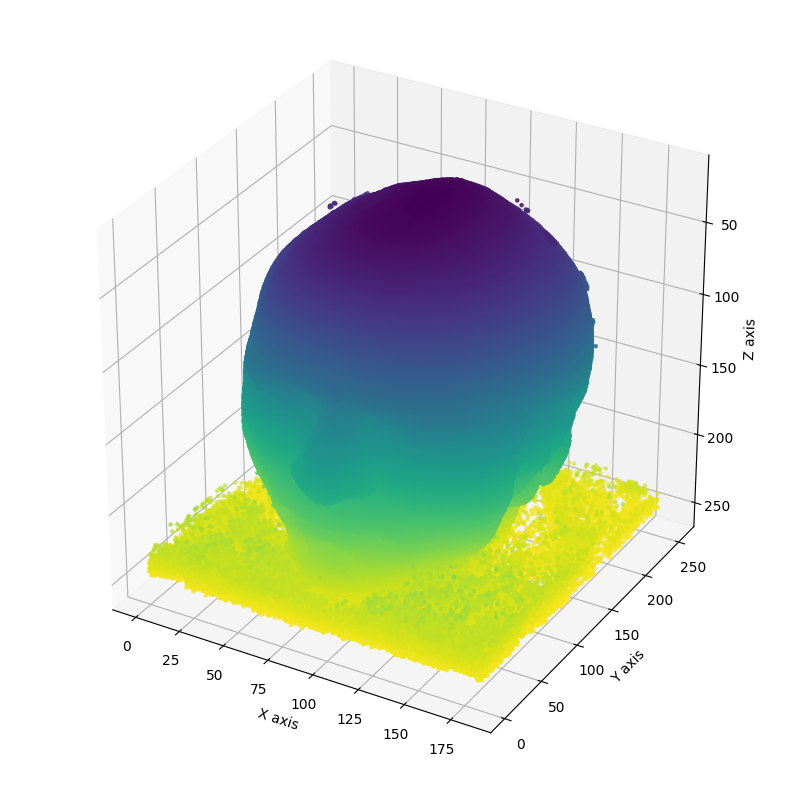

In [71]:
# Create a figure and a 3D subplot
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Threshold the volume to find the voxels to plot
# Adjust the threshold value as needed for your data
threshold = series_downsampled.mean()
# threshold = 1200
x, y, z = np.where(series_downsampled > threshold)

# Plot the points
ax.scatter(x, y, z, c=z, cmap='viridis', marker='.')
ax.invert_zaxis()

# Set labels and show the plot
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
plt.show()